In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.insert(0, "../src/")
import re
import numpy as np
import pandas as pd
from tqdm import tqdm
from processor import DocProcessor
from vectorizer import Doc2VecVectorizer

raw_docs_dir = "../data/raw_docs/"
labels_dir = "../data/labels/"


def get_doc_paths(docs_dir, lang):
    doc_paths = [os.path.join(docs_dir, lang, doc_name) for doc_name in os.listdir(os.path.join(docs_dir, lang)) if doc_name[-4:] == ".txt"]
    return doc_paths

def read_labels(lang):
    labels_df = pd.read_csv(os.path.join(labels_dir, lang, "canonisation_scores.csv"), sep=";")
    if lang == "eng":
        file_name_mapper = {
            'The Wild Irish Girl': 'Owenson_Sydney_The-Wild-Irish-Girl_1806',
            'Somerville-Ross_The-Real-Charlotte_1894': "Somerville-Ross_Edith-Martin_The-Real-Charlotte_1894",
            'LeFanu_Joseph-Sheridan_Schalken-the-Painter_1851.txt': 'LeFanu_Joseph-Sheridan_Schalken-the-Painter_1851',
        }

        for key, value in file_name_mapper.items():
            labels_df["file_name"][labels_df["file_name"] == key] = value
        
        extra_file_names = [
            "Austen_Jane_Northanger-Abbey_1818",
            "Cleland_John_Fanny-Hill_1748",
            "Defoe_Daniel_Roxana_1724",
            "Fielding_Henry_Amelia_1752",
            "Kingsley_Charles_The-Water-Babies_1863",
            "Le-Queux_William_The-Invasion-of-1910_1906",
            "Surtees_Robert_Jorrocks-Jaunts-and-Jollities_1831"
        ]
        labels_df = dict(labels_df[~labels_df["file_name"].isin(extra_file_names)][["file_name", "percent"]].values)
    elif lang == "ger":
        file_name_mapper = {
            'Ebner-Eschenbach_Marie-von_Bozena_1876': 'Ebner-Eschenbach_Marie_Bozena_1876',
            'Ebner-Eschenbach_Marie-von_Das-Gemeindekind_1887': 'Ebner-Eschenbach_Marie_Das-Gemeindekind_1887',
            'Ebner-Eschenbach_Marie-von_Der-Kreisphysikus_1883': 'Ebner-Eschenbach_Marie_Der-Kreisphysikus_1883',
            'Ebner-Eschenbach_Marie-von_Der-Muff_1896': 'Ebner-Eschenbach_Marie_Der-Muff_1896',
            'Ebner-Eschenbach_Marie-von_Die-Freiherren-von-Gemperlein_1889': 'Ebner-Eschenbach_Marie_Die-Freiherren-von-Gemperlein_1889',
            'Ebner-Eschenbach_Marie-von_Die-Poesie-des-Unbewussten_1883': 'Ebner-Eschenbach_Marie_Die-Poesie-des-Unbewussten_1883',
            'Ebner-Eschenbach_Marie-von_Die-Resel_1883': 'Ebner-Eschenbach_Marie_Die-Resel_1883',
            'Ebner-Eschenbach_Marie-von_Ein-kleiner-Roman_1887': 'Ebner-Eschenbach_Marie_Ein-kleiner-Roman_1887',
            'Ebner-Eschenbach_Marie-von_Krambabuli_1883': 'Ebner-Eschenbach_Marie_Krambabuli_1883',
            'Ebner-Eschenbach_Marie-von_Lotti-die-Uhrmacherin_1874': 'Ebner-Eschenbach_Marie_Lotti-die-Uhrmacherin_1874',
            'Ebner-Eschenbach_Marie-von_Rittmeister-Brand_1896': 'Ebner-Eschenbach_Marie_Rittmeister-Brand_1896',
            'Ebner-Eschenbach_Marie-von_Unsuehnbar_1890': 'Ebner-Eschenbach_Marie_Unsuehnbar_1890',
            'Hunold_Christian-Friedrich_Adalie_1702': 'Hunold_Christian_Friedrich_Die-liebenswuerdige-Adalie_1681'
        }
        for key, value in file_name_mapper.items():
            labels_df["file_name"][labels_df["file_name"] == key] = value
    return labels_df


[nltk_data] Downloading package punkt to /Users/arda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


# Process data

In [2]:
lang = "eng"
raw_doc_paths = get_doc_paths(raw_docs_dir, lang)
dp = DocProcessor(lang=lang, processed_chunk_sentence_count=None, stride=None)
dp.process(raw_doc_paths)

INFO:root:Processing texts...
100%|██████████| 599/599 [02:37<00:00,  3.80it/s]
INFO:root:Processed texts.


In [10]:
lang = "ger"
raw_doc_paths = get_doc_paths(raw_docs_dir, lang)
dp = DocProcessor(lang=lang, processed_chunk_sentence_count=None, stride=None)
dp.process(raw_doc_paths)

INFO:root:Processing texts...
100%|██████████| 547/547 [01:58<00:00,  4.63it/s]
INFO:root:Processed texts.


In [28]:
lang = "eng"
raw_doc_paths = get_doc_paths(raw_docs_dir, lang)
dp = DocProcessor(lang=lang, processed_chunk_sentence_count=500, stride=500)
dp.process(raw_doc_paths)

INFO:root:Processing texts...
100%|██████████| 599/599 [02:39<00:00,  3.76it/s]
INFO:root:Processed texts.


In [12]:
lang = "ger"
raw_doc_paths = get_doc_paths(raw_docs_dir, lang)
dp = DocProcessor(lang=lang, processed_chunk_sentence_count=500, stride=500)
dp.process(raw_doc_paths)

INFO:root:Processing texts...
100%|██████████| 547/547 [03:19<00:00,  2.74it/s]
INFO:root:Processed texts.


# Full documents

In [8]:
lang = "eng"
processed_full_doc_paths = get_doc_paths("../data/processed_docs_full/", lang)
d2vv = Doc2VecVectorizer()
d2vv.fit(processed_full_doc_paths)
df = d2vv.get_doc_vectors()
labels = read_labels("eng")
df['y'] = df["doc_path"].apply(lambda x: labels[x.split("/")[-1][:-4]])
df = df.drop(columns=['doc_path'])

INFO:root:Fitting Doc2VecVectorizer...
DEBUG:gensim.utils:starting a new internal lifecycle event log for Doc2Vec
INFO:gensim.utils:Doc2Vec lifecycle event {'params': 'Doc2Vec(dm/m,d100,n5,w4,mc2,s0.001,t4)', 'datetime': '2021-04-08T09:50:40.617242', 'gensim': '4.0.0', 'python': '3.8.5 (v3.8.5:580fbb018f, Jul 20 2020, 12:11:27) \n[Clang 6.0 (clang-600.0.57)]', 'platform': 'macOS-10.15.4-x86_64-i386-64bit', 'event': 'created'}
INFO:gensim.models.doc2vec:collecting all words and their counts
100%|██████████| 599/599 [00:15<00:00, 39.09it/s]
INFO:gensim.models.doc2vec:collected 176680 word types and 599 unique tags from a corpus of 599 examples and 60607461 words
INFO:gensim.models.word2vec:Creating a fresh vocabulary
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'effective_min_count=2 retains 103249 unique words (58.43841974190627%% of original 176680, drops 73431)', 'datetime': '2021-04-08T09:50:56.436916', 'gensim': '4.0.0', 'python': '3.8.5 (v3.8.5:580fbb018f, Jul 20 2020, 12:11:2

INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training model with 4 workers on 103249 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=4', 'datetime': '2021-04-08T09:51:17.512826', 'gensim': '4.0.0', 'python': '3.8.5 (v3.8.5:580fbb018f, Jul 20 2020, 12:11:27) \n[Clang 6.0 (clang-600.0.57)]', 'platform': 'macOS-10.15.4-x86_64-i386-64bit', 'event': 'train'}
100%|██████████| 599/599 [00:08<00:00, 68.92it/s]
DEBUG:gensim.models.word2vec:job loop exiting, total 590 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 136 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 156 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 142 jobs
DEBUG:gensim.models.word2vec:worker exiting, pro

INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training on 60607461 raw words (5078565 effective words) took 8.5s, 600733 effective words/s', 'datetime': '2021-04-08T09:51:43.138254', 'gensim': '4.0.0', 'python': '3.8.5 (v3.8.5:580fbb018f, Jul 20 2020, 12:11:27) \n[Clang 6.0 (clang-600.0.57)]', 'platform': 'macOS-10.15.4-x86_64-i386-64bit', 'event': 'train'}
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training model with 4 workers on 103249 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=4', 'datetime': '2021-04-08T09:51:43.139598', 'gensim': '4.0.0', 'python': '3.8.5 (v3.8.5:580fbb018f, Jul 20 2020, 12:11:27) \n[Clang 6.0 (clang-600.0.57)]', 'platform': 'macOS-10.15.4-x86_64-i386-64bit', 'event': 'train'}
100%|██████████| 599/599 [00:08<00:00, 74.02it/s]
DEBUG:gensim.models.word2vec:job loop exiting, total 580 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 146 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 141 jobs
INFO:

INFO:gensim.models.word2vec:EPOCH - 1 : training on 60607461 raw words (5079003 effective words) took 8.0s, 632040 effective words/s
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training on 60607461 raw words (5079003 effective words) took 8.0s, 631629 effective words/s', 'datetime': '2021-04-08T09:52:07.872265', 'gensim': '4.0.0', 'python': '3.8.5 (v3.8.5:580fbb018f, Jul 20 2020, 12:11:27) \n[Clang 6.0 (clang-600.0.57)]', 'platform': 'macOS-10.15.4-x86_64-i386-64bit', 'event': 'train'}
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training model with 4 workers on 103249 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=4', 'datetime': '2021-04-08T09:52:07.873245', 'gensim': '4.0.0', 'python': '3.8.5 (v3.8.5:580fbb018f, Jul 20 2020, 12:11:27) \n[Clang 6.0 (clang-600.0.57)]', 'platform': 'macOS-10.15.4-x86_64-i386-64bit', 'event': 'train'}
100%|██████████| 599/599 [00:08<00:00, 74.61it/s]
DEBUG:gensim.models.word2vec:job loop exiting, total 586 jobs


INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 148 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 154 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.word2vec:EPOCH - 1 : training on 60607461 raw words (5078969 effective words) took 8.3s, 608599 effective words/s
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training on 60607461 raw words (5078969 effective words) took 8.3s, 608320 effective words/s', 'datetime': '2021-04-08T09:52:32.968698', 'gensim': '4.0.0', 'python': '3.8.5 (v3.8.5:580fbb018f, Jul 20 2020, 12:11:27) \n[Clang 6.0 (clang-600.0.57)]', 'platform': 'macOS-10.15.4-x86_64-i386-64bit', 'event': 'train'}
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training model with 4 workers on 103249 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=4', 'datetime': '2021-04-08T09:52:3

100%|██████████| 599/599 [00:09<00:00, 62.46it/s]
DEBUG:gensim.models.word2vec:job loop exiting, total 585 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 142 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 143 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 155 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 145 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.word2vec:EPOCH - 1 : training on 60607461 raw words (5078664 effective words) took 9.6s, 527077 effective words/s
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training on 60607461 raw words (5078664 effective words) took 9.6s, 526880 effective words/s', 'datetime

100%|██████████| 599/599 [00:08<00:00, 72.25it/s]
DEBUG:gensim.models.word2vec:job loop exiting, total 583 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 139 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 149 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 147 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 148 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.word2vec:EPOCH - 1 : training on 60607461 raw words (5078781 effective words) took 8.3s, 608926 effective words/s
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training on 60607461 raw words (5078781 effective words) took 8.3s, 608678 effective words/s', 'datetime

100%|██████████| 599/599 [00:08<00:00, 70.36it/s]
DEBUG:gensim.models.word2vec:job loop exiting, total 584 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 149 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 145 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 145 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 145 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.word2vec:EPOCH - 1 : training on 60607461 raw words (5078468 effective words) took 8.5s, 594005 effective words/s
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training on 60607461 raw words (5078468 effective words) took 8.6s, 593567 effective words/s', 'datetime

100%|██████████| 599/599 [00:08<00:00, 69.81it/s]
DEBUG:gensim.models.word2vec:job loop exiting, total 586 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 146 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 149 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 149 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 142 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.word2vec:EPOCH - 1 : training on 60607461 raw words (5078879 effective words) took 8.7s, 586434 effective words/s
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training on 60607461 raw words (5078879 effective words) took 8.7s, 586112 effective words/s', 'datetime

INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training model with 4 workers on 103249 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=4', 'datetime': '2021-04-08T09:54:36.610988', 'gensim': '4.0.0', 'python': '3.8.5 (v3.8.5:580fbb018f, Jul 20 2020, 12:11:27) \n[Clang 6.0 (clang-600.0.57)]', 'platform': 'macOS-10.15.4-x86_64-i386-64bit', 'event': 'train'}
100%|██████████| 599/599 [00:08<00:00, 74.25it/s]
DEBUG:gensim.models.word2vec:job loop exiting, total 586 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 150 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 150 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 147 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 139 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.word2vec:EPOCH 1 - PROGRESS: at 99.83% examples, 62

INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training model with 4 workers on 103249 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=4', 'datetime': '2021-04-08T09:55:01.550459', 'gensim': '4.0.0', 'python': '3.8.5 (v3.8.5:580fbb018f, Jul 20 2020, 12:11:27) \n[Clang 6.0 (clang-600.0.57)]', 'platform': 'macOS-10.15.4-x86_64-i386-64bit', 'event': 'train'}
100%|██████████| 599/599 [00:08<00:00, 73.11it/s]
DEBUG:gensim.models.word2vec:job loop exiting, total 581 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 142 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 143 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 145 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
DEBUG:gensim.models.word2vec:worker exiting, pro

In [25]:
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = df.drop(columns=['y']).values
y = df["y"].values.ravel()

all_predictions = []
all_labels = []
kf = KFold(n_splits=10, shuffle=True, random_state=42)
for index, (train_indices, validation_indices) in enumerate(kf.split(X)):
    train_X = X[train_indices, :]
    train_y = y[train_indices]
    validation_X = X[validation_indices, :]
    validation_y = y[validation_indices]
    
    model = SVR(C=30)
    model.fit(train_X, train_y)
    train_yhat = model.predict(train_X)
    validation_yhat = model.predict(validation_X)
    all_labels.extend(validation_y.tolist())
    all_predictions.extend(validation_yhat.tolist())
    train_mse = mean_squared_error(train_y, train_yhat)
    train_mae = mean_absolute_error(train_y, train_yhat)
    validation_mse = mean_squared_error(validation_y, validation_yhat)
    validation_mae = mean_absolute_error(validation_y, validation_yhat)
    print(f"Fold: {index+1}, TrainMSE: {train_mse}, TrainMAE: {train_mae}, ValMSE: {validation_mse}, ValMAE: {validation_mae}")
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

Fold: 1, TrainMSE: 130.32080475297153, TrainMAE: 5.6551755176841825, ValMSE: 660.8629199253104, ValMAE: 19.07240698031934
Fold: 2, TrainMSE: 151.00113881557442, TrainMAE: 6.178720082327512, ValMSE: 370.8800996269411, ValMAE: 14.169112447036964
Fold: 3, TrainMSE: 150.01656000225623, TrainMAE: 6.267869262316337, ValMSE: 284.46622542459477, ValMAE: 13.070027834189158
Fold: 4, TrainMSE: 146.72748292506944, TrainMAE: 6.001013565923731, ValMSE: 426.97866155943206, ValMAE: 16.129110488255876
Fold: 5, TrainMSE: 149.90582619220487, TrainMAE: 6.234651774488244, ValMSE: 330.0314586240001, ValMAE: 13.908030307843376
Fold: 6, TrainMSE: 145.6034973846239, TrainMAE: 5.9638254061353315, ValMSE: 527.8679069009091, ValMAE: 17.636708189161414
Fold: 7, TrainMSE: 149.98824250171182, TrainMAE: 5.943049073352656, ValMSE: 590.3832967866931, ValMAE: 18.54085460475645
Fold: 8, TrainMSE: 152.84995259073781, TrainMAE: 6.241936325774398, ValMSE: 373.4923250980522, ValMAE: 14.191112616530116
Fold: 9, TrainMSE: 152.

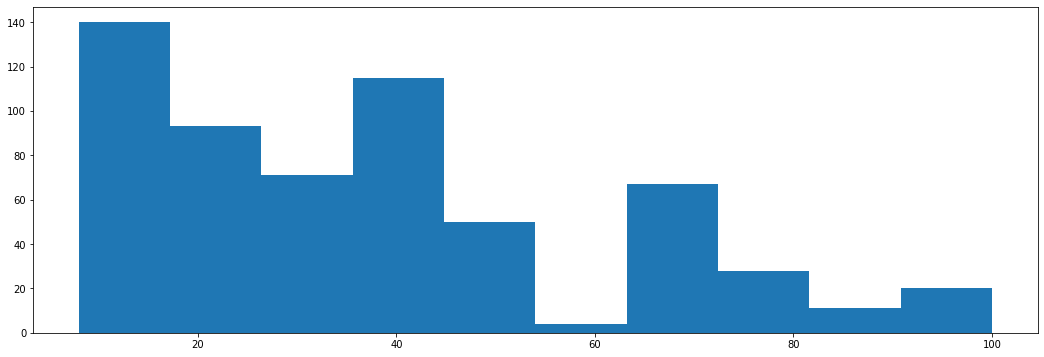

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.hist(all_labels)
plt.show();

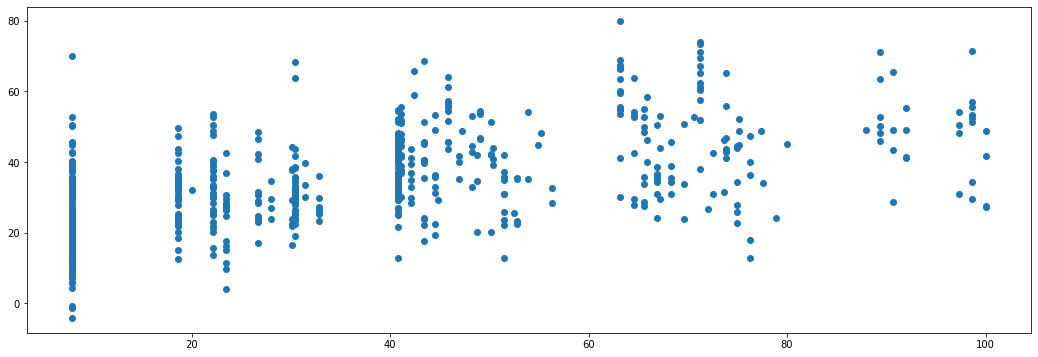

In [27]:
plt.figure(figsize=(18, 6))
plt.scatter(all_labels, all_predictions)
plt.show();

# Chunks of 500 Sentences

In [29]:
lang = "eng"
processed_sc_500_st_500_doc_paths = get_doc_paths("../data/processed_docs_sc_500_st_500/", lang)
d2vv = Doc2VecVectorizer()
d2vv.fit(processed_sc_500_st_500_doc_paths)
df = d2vv.get_doc_vectors()
labels = read_labels("eng")
df['y'] = df["doc_path"].apply(lambda x: labels[x.split("/")[-1][:-4].split("_pt")[0]])
df['book_name'] = df['doc_path'].apply(lambda x: x.split("/")[-1][:-4].split("_pt")[0])


INFO:root:Fitting Doc2VecVectorizer...
DEBUG:gensim.utils:starting a new internal lifecycle event log for Doc2Vec
INFO:gensim.utils:Doc2Vec lifecycle event {'params': 'Doc2Vec(dm/m,d100,n5,w4,mc2,s0.001,t4)', 'datetime': '2021-04-08T10:07:19.864339', 'gensim': '4.0.0', 'python': '3.8.5 (v3.8.5:580fbb018f, Jul 20 2020, 12:11:27) \n[Clang 6.0 (clang-600.0.57)]', 'platform': 'macOS-10.15.4-x86_64-i386-64bit', 'event': 'created'}
INFO:gensim.models.doc2vec:collecting all words and their counts
100%|██████████| 5682/5682 [00:24<00:00, 234.53it/s]
INFO:gensim.models.doc2vec:collected 173326 word types and 5682 unique tags from a corpus of 5682 examples and 58168457 words
INFO:gensim.models.word2vec:Creating a fresh vocabulary
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'effective_min_count=2 retains 100886 unique words (58.20592409678871%% of original 173326, drops 72440)', 'datetime': '2021-04-08T10:07:44.565772', 'gensim': '4.0.0', 'python': '3.8.5 (v3.8.5:580fbb018f, Jul 20 2020, 12

100%|██████████| 5682/5682 [00:39<00:00, 142.32it/s]
DEBUG:gensim.models.word2vec:job loop exiting, total 5655 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1403 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1421 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1426 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1405 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.word2vec:EPOCH - 1 : training on 58168457 raw words (40904396 effective words) took 40.0s, 1023339 effective words/s
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training on 58168457 raw words (40904396 effective words) took 40.0s, 1023088 effective words

100%|██████████| 5682/5682 [00:40<00:00, 139.95it/s]
DEBUG:gensim.models.word2vec:job loop exiting, total 5658 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1426 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1418 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1421 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.word2vec:EPOCH - 1 : training on 58168457 raw words (40901206 effective words) took 40.7s, 1005739 effective words/s
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training on 58168457 raw words (40901206 effective words) took 40.7s, 1005530 effective words/s', 'datetime': '2021-04-08T10:09:07.090146', 'gensim': '4.0.0',

100%|██████████| 5682/5682 [00:40<00:00, 139.05it/s]
DEBUG:gensim.models.word2vec:job loop exiting, total 5654 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1398 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1435 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1410 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 0 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1411 jobs
INFO:gensim.models.word2vec:EPOCH - 1 : training on 58168457 raw words (40901758 effective words) took 40.9s, 999017 effective words/s
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training on 58168457 raw words (40901758 effective words) took 41.0s, 998792 effective words/s

100%|██████████| 5682/5682 [00:40<00:00, 140.43it/s]
DEBUG:gensim.models.word2vec:job loop exiting, total 5657 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1402 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1413 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1424 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1418 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.word2vec:EPOCH - 1 : training on 58168457 raw words (40907570 effective words) took 40.5s, 1010340 effective words/s
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training on 58168457 raw words (40907570 effective words) took 40.5s, 1010073 effective words

INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1414 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1417 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1421 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.word2vec:EPOCH - 1 : training on 58168457 raw words (40908983 effective words) took 39.0s, 1047968 effective words/s
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training on 58168457 raw words (40908983 effective words) took 39.0s, 1047807 effective words/s', 'datetime': '2021-04-08T10:11:07.595346', 'gensim': '4.0.0', 'python': '3.8.5 (v3.8.5:580fbb018f, Jul 20 2020, 12:11:27) \n[Clang 6.0 (clang-600.0.57)]', 'platform': 'macOS-10.

INFO:gensim.models.word2vec:EPOCH - 1 : training on 58168457 raw words (40905980 effective words) took 39.3s, 1041326 effective words/s
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training on 58168457 raw words (40905980 effective words) took 39.3s, 1041138 effective words/s', 'datetime': '2021-04-08T10:11:46.887347', 'gensim': '4.0.0', 'python': '3.8.5 (v3.8.5:580fbb018f, Jul 20 2020, 12:11:27) \n[Clang 6.0 (clang-600.0.57)]', 'platform': 'macOS-10.15.4-x86_64-i386-64bit', 'event': 'train'}
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training model with 4 workers on 100886 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=4', 'datetime': '2021-04-08T10:11:46.888500', 'gensim': '4.0.0', 'python': '3.8.5 (v3.8.5:580fbb018f, Jul 20 2020, 12:11:27) \n[Clang 6.0 (clang-600.0.57)]', 'platform': 'macOS-10.15.4-x86_64-i386-64bit', 'event': 'train'}
100%|██████████| 5682/5682 [00:39<00:00, 144.92it/s]
DEBUG:gensim.models.word2vec:job loop exiting, total 

INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training model with 4 workers on 100886 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=4', 'datetime': '2021-04-08T10:12:26.133530', 'gensim': '4.0.0', 'python': '3.8.5 (v3.8.5:580fbb018f, Jul 20 2020, 12:11:27) \n[Clang 6.0 (clang-600.0.57)]', 'platform': 'macOS-10.15.4-x86_64-i386-64bit', 'event': 'train'}
100%|██████████| 5682/5682 [00:36<00:00, 154.06it/s]
DEBUG:gensim.models.word2vec:job loop exiting, total 5652 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1425 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1411 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1414 jobs
DEBUG:gensim.models.word2vec:worker exiti

100%|██████████| 5682/5682 [00:34<00:00, 162.39it/s]
DEBUG:gensim.models.word2vec:job loop exiting, total 5660 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1407 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1415 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1426 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1412 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.word2vec:EPOCH - 1 : training on 58168457 raw words (40903560 effective words) took 35.0s, 1168172 effective words/s
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training on 58168457 raw words (40903560 effective words) took 35.0s, 1167895 effective words

100%|██████████| 5682/5682 [00:35<00:00, 161.33it/s]
DEBUG:gensim.models.word2vec:job loop exiting, total 5656 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1410 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1415 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1417 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1414 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.word2vec:EPOCH - 1 : training on 58168457 raw words (40907073 effective words) took 35.3s, 1160484 effective words/s
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training on 58168457 raw words (40907073 effective words) took 35.3s, 1160298 effective words

100%|██████████| 5682/5682 [00:34<00:00, 166.55it/s]
DEBUG:gensim.models.word2vec:job loop exiting, total 5647 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1406 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1427 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1399 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1415 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.word2vec:EPOCH - 1 : training on 58168457 raw words (40907280 effective words) took 34.2s, 1197768 effective words/s
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training on 58168457 raw words (40907280 effective words) took 34.2s, 1197618 effective words

100%|██████████| 5682/5682 [00:34<00:00, 165.71it/s]
DEBUG:gensim.models.word2vec:job loop exiting, total 5655 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1413 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1400 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1423 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1419 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.word2vec:EPOCH - 1 : training on 58168457 raw words (40904609 effective words) took 34.3s, 1191708 effective words/s
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training on 58168457 raw words (40904609 effective words) took 34.3s, 1191528 effective words

100%|██████████| 5682/5682 [00:34<00:00, 165.78it/s]
DEBUG:gensim.models.word2vec:job loop exiting, total 5661 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1417 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1417 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1416 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1411 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.word2vec:EPOCH - 1 : training on 58168457 raw words (40904539 effective words) took 34.3s, 1192041 effective words/s
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training on 58168457 raw words (40904539 effective words) took 34.3s, 1191865 effective words

INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.word2vec:EPOCH - 1 : training on 58168457 raw words (40908631 effective words) took 34.3s, 1194247 effective words/s
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training on 58168457 raw words (40908631 effective words) took 34.3s, 1194045 effective words/s', 'datetime': '2021-04-08T10:16:30.442791', 'gensim': '4.0.0', 'python': '3.8.5 (v3.8.5:580fbb018f, Jul 20 2020, 12:11:27) \n[Clang 6.0 (clang-600.0.57)]', 'platform': 'macOS-10.15.4-x86_64-i386-64bit', 'event': 'train'}
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training model with 4 workers on 100886 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=4', 'datetime': '2021-04-08T10:16:30.443877', 'gensim': '4.0.0', 'python': '3.8.5 (v3.8.5:580fbb018f, Jul 20 2020, 12:11:27) \n[Clang 6.0 (clang-600.0.57)]', 'platform': 'macOS-10.15.4-x86_64-i386-64bit', 'event': 'train'}
100%|██████████| 568

100%|██████████| 5682/5682 [00:34<00:00, 164.76it/s]
DEBUG:gensim.models.word2vec:job loop exiting, total 5657 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1415 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1408 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1424 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1410 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.word2vec:EPOCH - 1 : training on 58168457 raw words (40910229 effective words) took 34.5s, 1185445 effective words/s
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training on 58168457 raw words (40910229 effective words) took 34.5s, 1185240 effective words

100%|██████████| 5682/5682 [00:34<00:00, 165.87it/s]
DEBUG:gensim.models.word2vec:job loop exiting, total 5661 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1421 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1423 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1408 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1409 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.word2vec:EPOCH - 1 : training on 58168457 raw words (40904607 effective words) took 34.3s, 1192997 effective words/s
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training on 58168457 raw words (40904607 effective words) took 34.3s, 1192808 effective words

100%|██████████| 5682/5682 [00:34<00:00, 167.09it/s]
DEBUG:gensim.models.word2vec:job loop exiting, total 5658 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1408 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1421 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1426 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1403 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.word2vec:EPOCH - 1 : training on 58168457 raw words (40904185 effective words) took 34.0s, 1201746 effective words/s
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training on 58168457 raw words (40904185 effective words) took 34.0s, 1201591 effective words

100%|██████████| 5682/5682 [00:34<00:00, 163.53it/s]
DEBUG:gensim.models.word2vec:job loop exiting, total 5661 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1421 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1426 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1402 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1412 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.word2vec:EPOCH - 1 : training on 58168457 raw words (40904478 effective words) took 34.8s, 1176116 effective words/s
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training on 58168457 raw words (40904478 effective words) took 34.8s, 1175918 effective words

100%|██████████| 5682/5682 [00:35<00:00, 160.74it/s]
DEBUG:gensim.models.word2vec:job loop exiting, total 5659 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1414 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1428 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1410 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1407 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.word2vec:EPOCH - 1 : training on 58168457 raw words (40903032 effective words) took 35.4s, 1155820 effective words/s
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training on 58168457 raw words (40903032 effective words) took 35.4s, 1155620 effective words

INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1410 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1412 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.word2vec:EPOCH - 1 : training on 58168457 raw words (40907134 effective words) took 34.3s, 1194148 effective words/s
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training on 58168457 raw words (40907134 effective words) took 34.3s, 1193958 effective words/s', 'datetime': '2021-04-08T10:20:32.210709', 'gensim': '4.0.0', 'python': '3.8.5 (v3.8.5:580fbb018f, Jul 20 2020, 12:11:27) \n[Clang 6.0 (clang-600.0.57)]', 'platform': 'macOS-10.15.4-x86_64-i386-64bit', 'event': 'train'}
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training model with 4 workers on 100886 vocabulary and 10

100%|██████████| 5682/5682 [00:35<00:00, 158.78it/s]
DEBUG:gensim.models.word2vec:job loop exiting, total 5661 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1415 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1411 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1422 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1413 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.word2vec:EPOCH - 1 : training on 58168457 raw words (40908903 effective words) took 35.8s, 1142580 effective words/s
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training on 58168457 raw words (40908903 effective words) took 35.8s, 1142368 effective words

100%|██████████| 5682/5682 [00:34<00:00, 165.17it/s]
DEBUG:gensim.models.word2vec:job loop exiting, total 5659 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1409 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1406 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1421 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1423 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.word2vec:EPOCH - 1 : training on 58168457 raw words (40902469 effective words) took 34.4s, 1188186 effective words/s
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training on 58168457 raw words (40902469 effective words) took 34.4s, 1187977 effective words

100%|██████████| 5682/5682 [00:41<00:00, 137.83it/s]
DEBUG:gensim.models.word2vec:job loop exiting, total 5663 jobs
INFO:gensim.models.word2vec:EPOCH 1 - PROGRESS: at 99.89% examples, 990085 words/s, in_qsize 6, out_qsize 0
DEBUG:gensim.models.word2vec:worker exiting, processed 1403 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1406 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1437 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1417 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.word2vec:EPOCH - 1 : training on 58168457 raw words (40903893 effective words) took 41.3s, 990190 effective words/s
INFO:gensim.utils:Doc2Vec lifecycle e

100%|██████████| 5682/5682 [00:39<00:00, 144.60it/s]
DEBUG:gensim.models.word2vec:job loop exiting, total 5654 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1416 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1416 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1410 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1412 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.word2vec:EPOCH - 1 : training on 58168457 raw words (40905758 effective words) took 39.3s, 1040087 effective words/s
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training on 58168457 raw words (40905758 effective words) took 39.3s, 1039917 effective words

100%|██████████| 5682/5682 [00:40<00:00, 141.96it/s]
DEBUG:gensim.models.word2vec:job loop exiting, total 5652 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1403 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1417 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1424 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1408 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.word2vec:EPOCH - 1 : training on 58168457 raw words (40902565 effective words) took 40.1s, 1020512 effective words/s
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training on 58168457 raw words (40902565 effective words) took 40.1s, 1020378 effective words

100%|██████████| 5682/5682 [00:41<00:00, 137.59it/s]
DEBUG:gensim.models.word2vec:job loop exiting, total 5657 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1416 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1419 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1419 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1403 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.word2vec:EPOCH - 1 : training on 58168457 raw words (40907211 effective words) took 41.5s, 986796 effective words/s
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training on 58168457 raw words (40907211 effective words) took 41.5s, 986633 effective words/s

100%|██████████| 5682/5682 [00:37<00:00, 153.43it/s]
DEBUG:gensim.models.word2vec:job loop exiting, total 5651 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1421 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1401 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1420 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1409 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.word2vec:EPOCH - 1 : training on 58168457 raw words (40908503 effective words) took 37.1s, 1103599 effective words/s
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training on 58168457 raw words (40908503 effective words) took 37.1s, 1103411 effective words

100%|██████████| 5682/5682 [00:34<00:00, 165.81it/s]
DEBUG:gensim.models.word2vec:job loop exiting, total 5653 jobs
DEBUG:gensim.models.word2vec:worker exiting, processed 1399 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 3 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1413 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 2 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1423 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 1 more threads
DEBUG:gensim.models.word2vec:worker exiting, processed 1418 jobs
INFO:gensim.models.word2vec:worker thread finished; awaiting finish of 0 more threads
INFO:gensim.models.word2vec:EPOCH - 1 : training on 58168457 raw words (40906590 effective words) took 34.3s, 1192521 effective words/s
INFO:gensim.utils:Doc2Vec lifecycle event {'msg': 'training on 58168457 raw words (40906590 effective words) took 34.3s, 1192380 effective words

In [30]:
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

all_predictions = []
all_labels = []

book_names = df['book_name'].unique()
book_names_splitted = np.array_split(book_names, 10)

for index, split in enumerate(book_names_splitted):
    train_X = df[~df["book_name"].isin(split)].drop(columns=["y", "doc_path", "book_name"]).values
    train_y = df[~df["book_name"].isin(split)]["y"].values.ravel()
    validation_X = df[df["book_name"].isin(split)].drop(columns=["y", "doc_path", "book_name"]).values
    validation_y = df[df["book_name"].isin(split)]["y"].values.ravel()
    
    model = SVR(C=30)
    model.fit(train_X, train_y)
    train_yhat = model.predict(train_X)
    validation_yhat = model.predict(validation_X)
    all_labels.extend(validation_y.tolist())
    all_predictions.extend(validation_yhat.tolist())
    train_mse = mean_squared_error(train_y, train_yhat)
    train_mae = mean_absolute_error(train_y, train_yhat)
    validation_mse = mean_squared_error(validation_y, validation_yhat)
    validation_mae = mean_absolute_error(validation_y, validation_yhat)
    print(f"Fold: {index+1}, TrainMSE: {train_mse}, TrainMAE: {train_mae}, ValMSE: {validation_mse}, ValMAE: {validation_mae}")
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

Fold: 1, TrainMSE: 32.5883467080622, TrainMAE: 2.463417105514541, ValMSE: 416.11219118015384, ValMAE: 17.528358208503324
Fold: 2, TrainMSE: 28.357940636457112, TrainMAE: 2.320801516745964, ValMSE: 655.9749695835178, ValMAE: 18.67090953134696
Fold: 3, TrainMSE: 34.965199246782475, TrainMAE: 2.5502403467485024, ValMSE: 430.60339273382175, ValMAE: 17.179816418628906
Fold: 4, TrainMSE: 34.032777754339605, TrainMAE: 2.4644979197421066, ValMSE: 469.0843264579656, ValMAE: 16.43958228661795
Fold: 5, TrainMSE: 30.964083282243248, TrainMAE: 2.3503689716747673, ValMSE: 499.92014840547625, ValMAE: 18.886444239410913
Fold: 6, TrainMSE: 27.594062558125938, TrainMAE: 2.2571074349563585, ValMSE: 593.4534769368796, ValMAE: 19.048230818292257
Fold: 7, TrainMSE: 29.38017632198301, TrainMAE: 2.334560010299353, ValMSE: 460.03023590817907, ValMAE: 17.82348800822126
Fold: 8, TrainMSE: 32.26171281354653, TrainMAE: 2.4573628164949044, ValMSE: 360.37244329483497, ValMAE: 14.159499513546137
Fold: 9, TrainMSE: 32

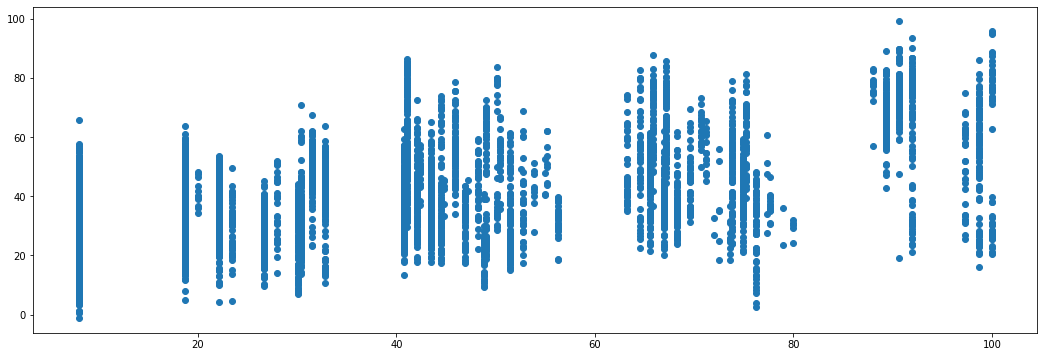

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.scatter(all_labels, all_predictions)